## 비계층적 군집분석

### K-means
__가.__ 개념
* 주어진 데이터를 k개의 클러스터로 묶는 알고리즘
* 각 클러스터와 거리 차이의 분산을 최소화 하는 방식으로 작동
    - n개의 객체들을 각 집합 내 객체간 응집도를 최대로 하는 k개의 집합 S를 찾는 것이 목표
    - 응집도 : 각 집합별 중심점 ~ 집합 내 객체들 간 거리의 제곱합
 
 ![image.png](https://scikit-learn.org/stable/_images/sphx_glr_plot_affinity_propagation_001.png)
 * 출처 : https://scikit-learn.org/stable/modules/clustering.html#overview-of-clustering-methods
   
__나.__ 표준 알고리즘
* (1) i번째 클러스터의 중심을 mu_i, 클러스터에 속하는 점의 집합을 S_i라고 할 때, 전체 분산을 최소화하는 S를 찾는 것이 목표        
* (2) 초기의 mu_i를 설정 
* (3) 클러스터 설정: 각 데이터로부터 각 클러스터들의 mu_i까지의 유클리드 거리를 게산해, 해당 데이터에서 가장 가까운 클러스터를 찾아 데이터를 배당함   
     
* (4) 클러스터 중심 재조정: mu_i를 각 클러스터에 있는 데이터들의 무게중심 값으로 재설정   

* 알고리즘을 실행하는 동안 여러 개의 최근접 이웃 검색이 필요하기 때문에 이 알고리즘은 확장성이 높지 않습니다. 알고리즘은 중심 변화가 작을 때 알고리즘은 반복을 중지합니다.
![image-2.png](https://scikit-learn.org/stable/_images/sphx_glr_plot_mean_shift_001.png)

최적의 군집개수를 결정하는 방법 세 가지
* 콜린스키 하라바츠 스코어
* 엘보우 방법
* 실루엣 방법

KMeans(n_clusters=8, random_state=None)   
* n_clusters: 클러스터의 개수

__[예제]__   
iris 데이터로 kmeans 군집분석을 해보자

In [1]:
# 필요한 모듈 
import pandas as pd
from sklearn.cluster import KMeans

# 데이터 로드
iris = pd.read_csv('./data/iris.csv')
X = iris.drop('target', axis=1)
X

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
# K-Means 군집화 실행
km = KMeans(n_clusters=2, random_state=1)
km.fit(X)

KMeans(n_clusters=2, random_state=1)

In [6]:
# 할당된 군집을 iris 데이터에 추가
new_labels = km.labels_
iris['cluster'] = new_labels

In [7]:
iris

,sepal length,sepal width,petal length,petal width,target,cluster
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,1
146,6.3,2.5,5.0,1.9,Iris-virginica,1
147,6.5,3.0,5.2,2.0,Iris-virginica,1
148,6.2,3.4,5.4,2.3,Iris-virginica,1


최적의 클러스터 개수를 결정하는데 사용되는 방법 (1)   
* Calinski-Harabasz (콜린스키 하라바츠 지수)
    * 모든 클러스터에 대한 클러스터 간 분산과 클러스타 내 분산의 합의 비율
    * 점수가 높을수록 성능이 좋음
    * 장점
        - 계산이 빠름
    * 단점
        - 밀도 기반 클러스터에서 점수가 더 높게 나타나는 경향이 있음

In [14]:
# 군집분석 평가척도 : 콜린스키 하라바츠
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz_score(X, new_labels)

513.3038433517568

In [17]:
# 클러스터별 콜린스키 하라바츠 결과 비교
for k in range(2, 10) : 
    kmeans_model = KMeans(n_clusters=k, random_state=1).fit(X)
    labels = kmeans_model.labels_
    print(calinski_harabasz_score(X, labels))

513.3038433517568
560.3999242466402
529.1207190840455
494.0943819140986
474.51742958716295
448.8714494416451
436.61302488142496
414.5303174051382


* iris 데이터는 군집이 3일 때, 가장 점수가 높음 

최적의 클러스터 개수를 결정하는데 사용되는 방법 (2)   
* 엘보우 기법
    - 클러스터 내 오차제곱합(SSE)을 클러스터 개수마다 비교
    - 클러스터 개수를 늘려나가면서 계산한 SSE를 비교
    - 어느 순간 줄어드는 비율이 급격하게 작아지는 부분과 기울기가 소실되는 구간이 생김 (=팔꿈치, eblow)
    - 그 부분이 최적의 클러스터 개수임

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
def elbow(X) : 
    see = []
    for i in range(1,11) : 
        km = KMeans(n_clusters=i, random_state=1)
        km.fit(X)
        see.append(km.inertia_)
        
    plt.plot(range(1,11), see, marker='o')
    plt.xlabel('The Number of Clusters')
    plt.ylabel('SSE')
    plt.show()
    print(see)

In [20]:
km.inertia_

152.36870647733906

C:\Users\LG\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


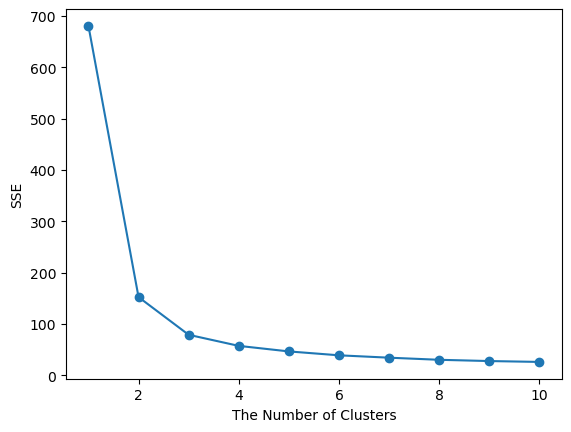

[680.8244, 152.36870647733906, 78.94084142614601, 57.34540931571816, 46.535582051282056, 38.95701115711986, 34.326529914529914, 30.227724598930486, 27.766706937799043, 26.07225182334006]


In [21]:
elbow(X)

<결과해석>  
3에서 4로 갈때, 기울기가 소실됨, 그러므로 군집의 수는 2~3이 적당함 

### 밀도기반 클러스터 DBSCAN

![image-2.png](https://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_001.png)

In [28]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5).fit(X)
dbscan

DBSCAN()

In [29]:
dbscan.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [25]:
dbscan_df = X.copy()

In [30]:
dbscan_df['cluster'] = dbscan.labels_

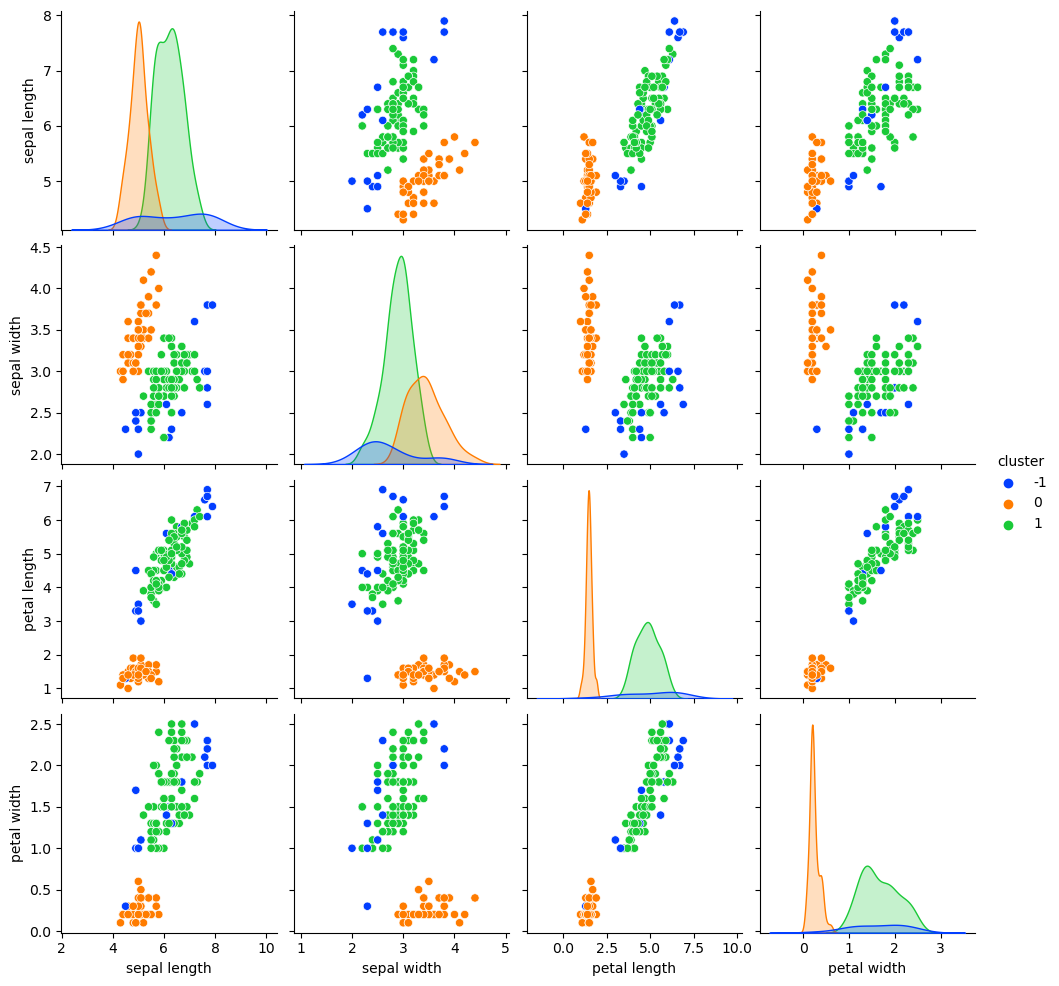

In [33]:
# dbscan_df 시각화
# 군집결과 시각화
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.pairplot(dbscan_df, diag_kind='kde', hue='cluster',
#             corner = True,  # 직각삼각형 모양으로 산점도 행렬 만드려면 주석 해제
            palette='bright')

plt.show()

* 위의 결과를 보면, 원본 데이터와 많이 차이가 나는 것을 알 수 있다. 
* DBSCAN은 밀도기반 클러스터이기 때문에 위와 같은 데이터 분포의 특징을 잘 반영하지 못한다. 